In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import auc
from sklearn.metrics import roc_curve


In [2]:
my_data = pd.read_csv("clevBinary.csv", delimiter=",")
my_data[0:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [3]:
my_data.shape

(297, 14)

In [4]:
my_data.size

4158

In [5]:
X = my_data[['age', 'sex', 'cp','trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']].values
X[0:5]

array([[ 63. ,   1. ,   1. , 145. , 233. ,   1. ,   2. , 150. ,   0. ,
          2.3,   3. ,   0. ,   6. ],
       [ 67. ,   1. ,   4. , 160. , 286. ,   0. ,   2. , 108. ,   1. ,
          1.5,   2. ,   3. ,   3. ],
       [ 67. ,   1. ,   4. , 120. , 229. ,   0. ,   2. , 129. ,   1. ,
          2.6,   2. ,   2. ,   7. ],
       [ 37. ,   1. ,   3. , 130. , 250. ,   0. ,   0. , 187. ,   0. ,
          3.5,   3. ,   0. ,   3. ],
       [ 41. ,   0. ,   2. , 130. , 204. ,   0. ,   2. , 172. ,   0. ,
          1.4,   1. ,   0. ,   3. ]])

In [6]:
y = my_data["num"]
y[0:5]

0    0
1    1
2    1
3    0
4    0
Name: num, dtype: int64

In [7]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.93618065,  0.69109474, -2.24062879,  0.75038004, -0.27644339,
         2.43042728,  1.01019851,  0.01749443, -0.69641941,  1.06896529,
         2.26414539, -0.72197605,  0.65587737],
       [ 1.3789285 ,  0.69109474,  0.87388018,  1.59626645,  0.74455507,
        -0.41145029,  1.01019851, -1.81633388,  1.43591632,  0.38177332,
         0.6437811 ,  2.47842525, -0.89422007],
       [ 1.3789285 ,  0.69109474,  0.87388018, -0.65943064, -0.35349988,
        -0.41145029,  1.01019851, -0.89941972,  1.43591632,  1.32666228,
         0.6437811 ,  1.41162482,  1.17257652],
       [-1.94168041,  0.69109474, -0.16428947, -0.09550637,  0.05104668,
        -0.41145029, -1.00341866,  1.63300986, -0.69641941,  2.09975324,
         2.26414539, -0.72197605, -0.89422007],
       [-1.49893255, -1.44697961, -1.20245913, -0.09550637, -0.83510292,
        -0.41145029,  1.01019851,  0.97807117, -0.69641941,  0.29587432,
        -0.97658319, -0.72197605, -0.89422007]])

In [8]:
from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=3)


In [9]:
X_trainset.shape

(237, 13)

In [10]:
X_testset.shape

(60, 13)

In [11]:
HeartTree = DecisionTreeClassifier(criterion="gini", max_depth = 3, min_samples_split=5, splitter='best',random_state=3  )
HeartTree # it shows the default parameters

DecisionTreeClassifier(max_depth=3, min_samples_split=5, random_state=3)

In [12]:
HeartTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(max_depth=3, min_samples_split=5, random_state=3)

In [13]:
predTree = HeartTree.predict(X_testset)

In [14]:
print (predTree [0:5])
print (y_testset [0:5])

[0 1 1 0 0]
84     0
31     1
38     1
25     0
260    0
Name: num, dtype: int64


In [15]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.85


In [16]:
cross_val_score(HeartTree, X, y, cv=10)

array([0.8       , 0.83333333, 0.86666667, 0.9       , 0.8       ,
       0.8       , 0.6       , 0.62068966, 0.75862069, 0.82758621])

In [17]:
cv_scores = cross_val_score(HeartTree, X, y, cv=10)

print('cv_scores mean:{}'.format(np.mean(cv_scores)))

cv_scores mean:0.7806896551724138


In [32]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



In [34]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

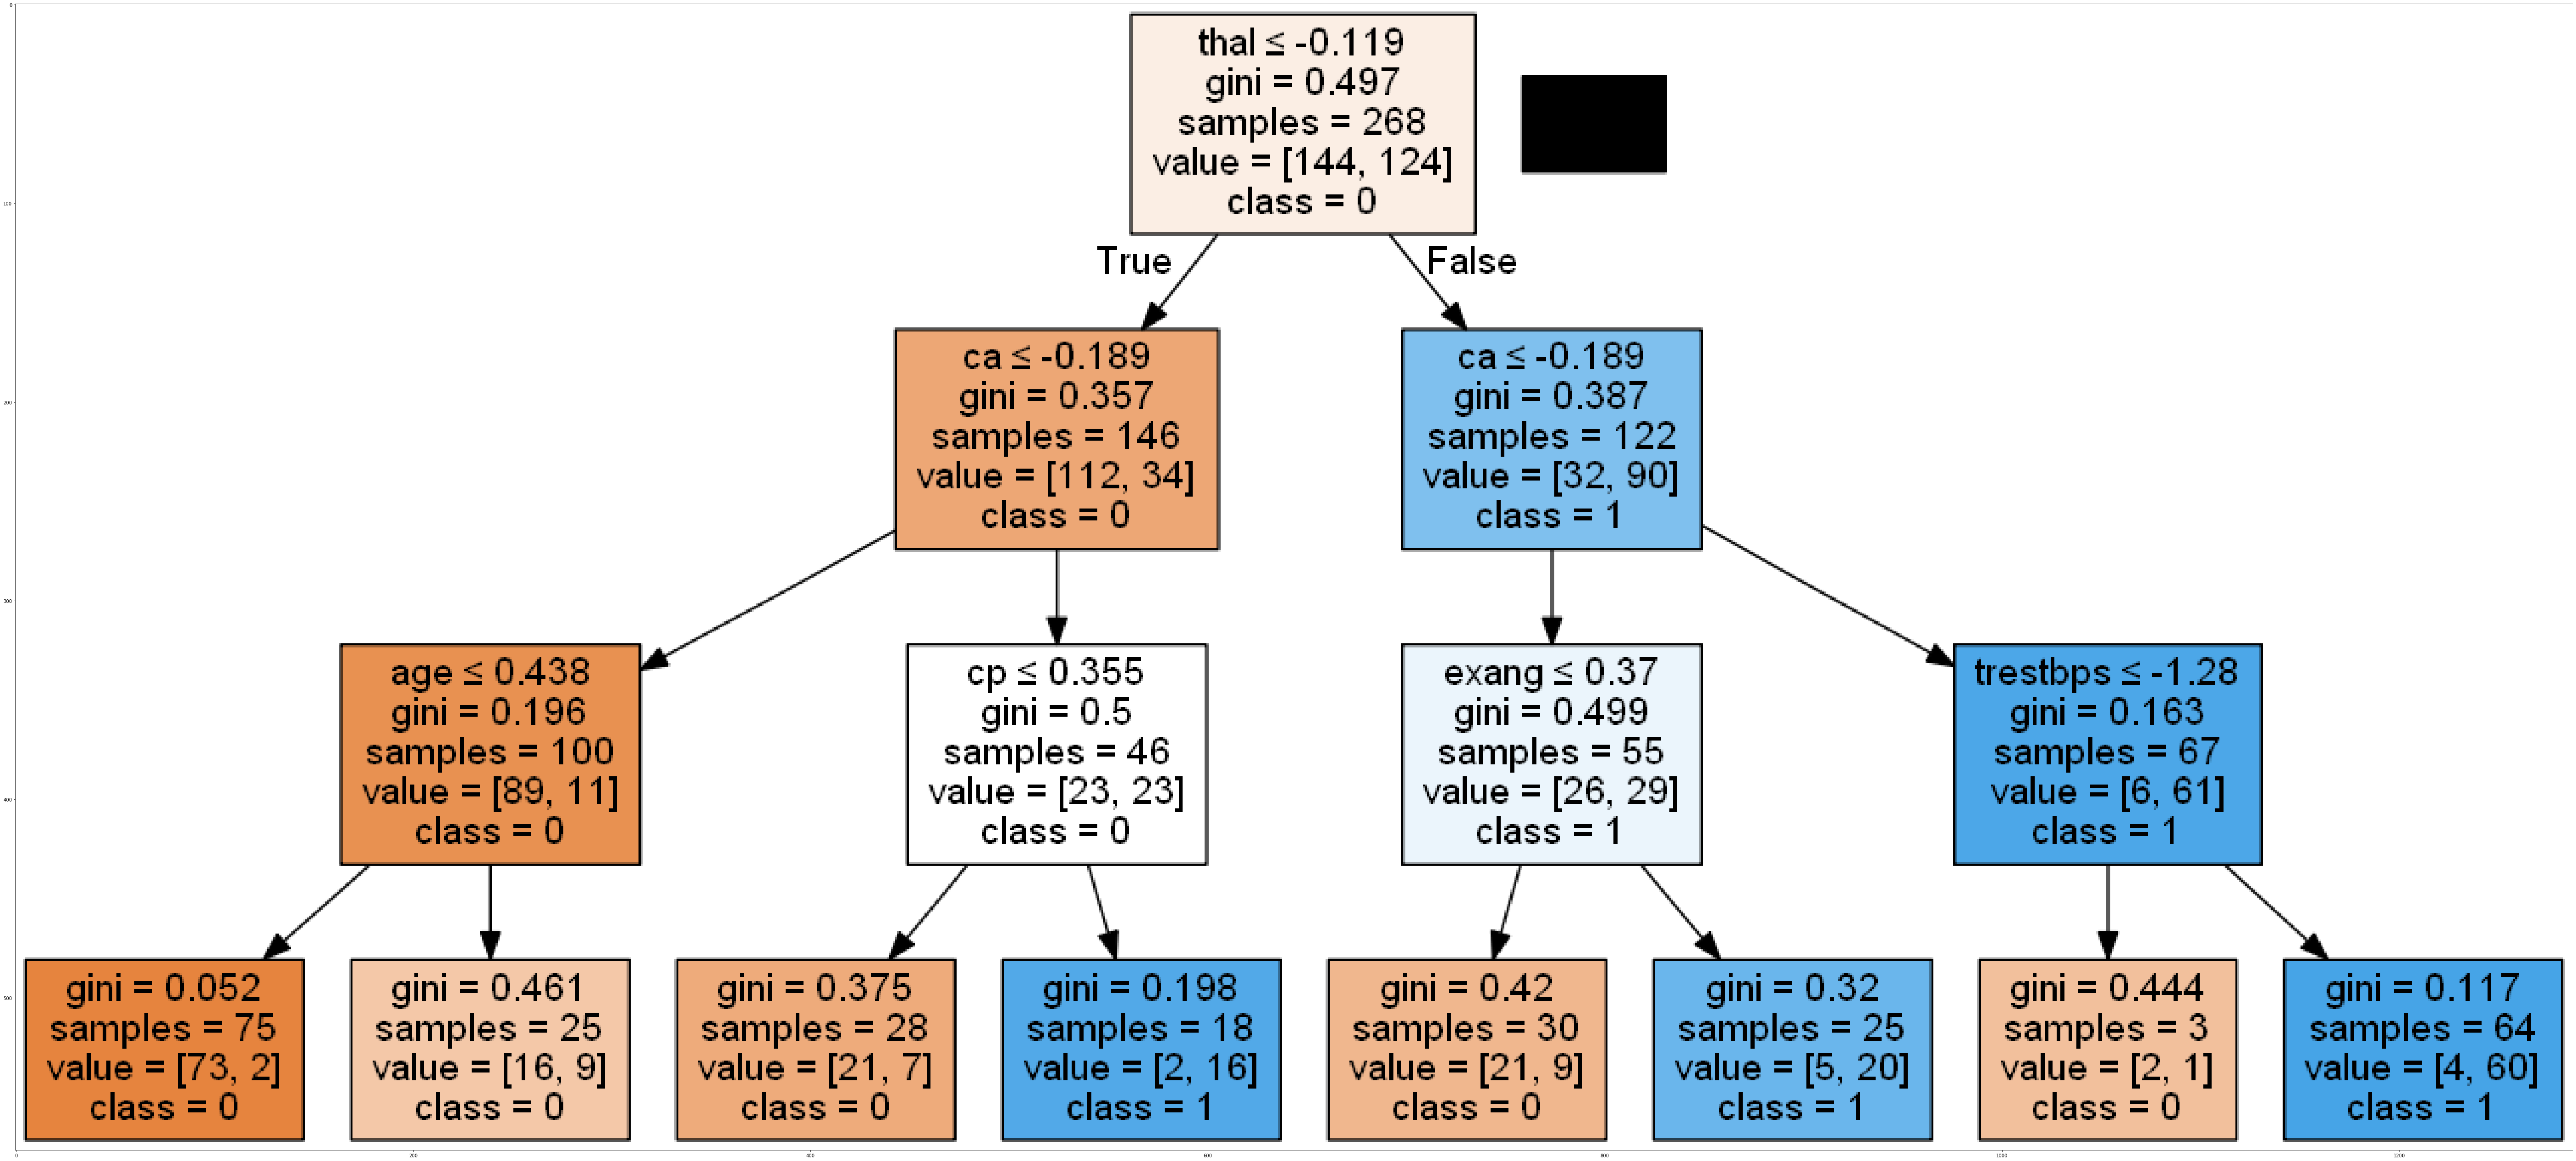

In [35]:
dot_data = StringIO()
filename = "HeartTreeBinary.png"
featureNames = my_data.columns[0:13]
out=tree.export_graphviz(HeartTree,feature_names=featureNames, out_file=dot_data, class_names= ['0', '1'], filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        31
           1       0.81      0.90      0.85        29

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60

Confusion matrix, without normalization
[[25  6]
 [ 3 26]]


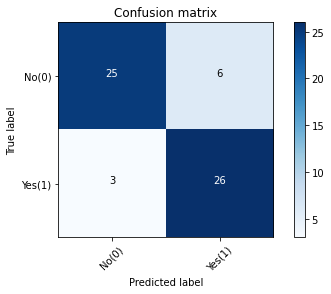

In [22]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_testset, predTree, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_testset, predTree))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No(0)','Yes(1)'],normalize= False,  title='Confusion matrix')

In [23]:
from sklearn.metrics import f1_score
f1_score(y_testset, predTree, average='binary', pos_label=1) 

0.8524590163934426

In [24]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_testset, predTree, pos_label=1)
roc_auc = auc(fpr, tpr)

Text(0.5, 1.0, 'ROC Curve of CART')

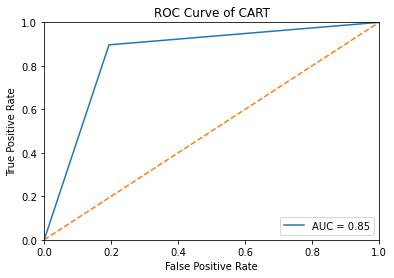

In [25]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], linestyle= '--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of CART')

In [26]:
yhat_prob = HeartTree.predict_proba(X_testset)
fpr, tpr, thresholds = metrics.roc_curve(y_testset, yhat_prob[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)

Text(0.5, 1.0, 'ROC Curve of CART')

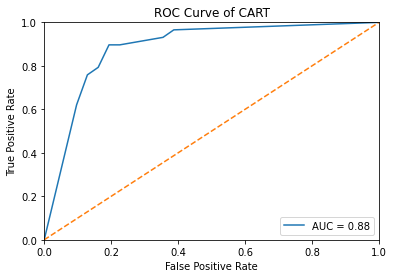

In [27]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], linestyle= '--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of CART')

### Attention!!!

class_names= , must be a str

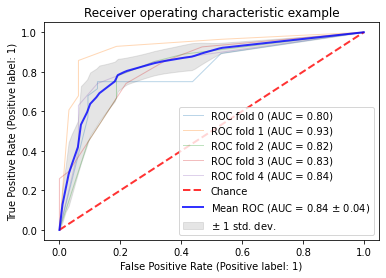

In [28]:
import matplotlib.pyplot as plt


from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)
classifier = HeartTree
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

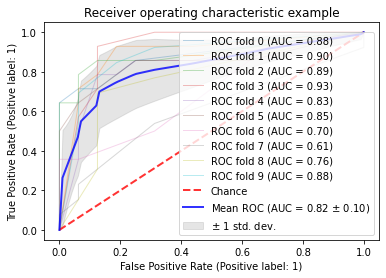

In [29]:
import matplotlib.pyplot as plt


from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)
classifier = HeartTree
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

In [30]:
import matplotlib.pyplot as plot
import numpy as num
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
#heart = X
data = X
target = y
classnames = ['No(0)','Yes(1)']
classnames
labels, counts = num.unique(target, return_counts=True)
print(data)
def evaluate_model(data_x, data_y):
    k_fold = KFold(10, shuffle=True, random_state=1)

    predicted_targets = num.array([])
    actual_targets = num.array([])

    for train_ix, test_ix in k_fold.split(data_x):
        train_x, train_y, test_x, test_y = data_x[train_ix], data_y[train_ix], data_x[test_ix], data_y[test_ix]

        classifiers = HeartTree.fit(train_x, train_y)
        predicted_labels = classifiers.predict(test_x)

        predicted_targets = num.append(predicted_targets, predicted_labels)
        actual_targets = num.append(actual_targets, test_y)

    return predicted_targets, actual_targets

[[ 0.94  0.69 -2.24 ...  2.26 -0.72  0.66]
 [ 1.38  0.69  0.87 ...  0.64  2.48 -0.89]
 [ 1.38  0.69  0.87 ...  0.64  1.41  1.17]
 ...
 [ 1.49  0.69  0.87 ...  0.64  1.41  1.17]
 [ 0.27  0.69  0.87 ...  0.64  0.34  1.17]
 [ 0.27 -1.45 -1.2  ...  0.64  0.34 -0.89]]


              precision    recall  f1-score   support

         0.0       0.79      0.87      0.82       160
         1.0       0.82      0.72      0.77       137

    accuracy                           0.80       297
   macro avg       0.81      0.80      0.80       297
weighted avg       0.80      0.80      0.80       297

Confusion matrix, without normalization


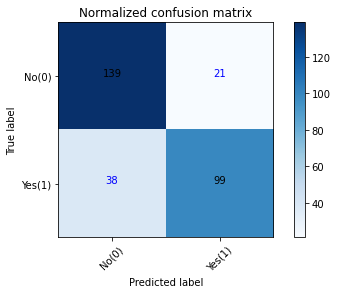

In [31]:
def plot_confusion_matrix(predicted_labels_list, y_test_list):
    cnf_matrix = confusion_matrix(y_test_list, predicted_labels_list, labels=[0,1])
    num.set_printoptions(precision=2)
    print (classification_report(actual_target, predicted_target))

   
    plot.figure()
    generate_confusion_matrix(cnf_matrix, classes=['No(0)','Yes(1)'], normalize=False, title='Normalized confusion matrix')
    plot.show()
def generate_confusion_matrix(cnf_matrix, classes, normalize=False, title='Confusion matrix'):
    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, num.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plot.imshow(cnf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plot.title(title)
    plot.colorbar()

    tick_marks = np.arange(len(classes))
    plot.xticks(tick_marks, classes, rotation=45)
    plot.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plot.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                 color="black" if cnf_matrix[i, j] > thresh else "blue")

    plot.tight_layout()
    plot.ylabel('True label')
    plot.xlabel('Predicted label')

    return cnf_matrix
predicted_target, actual_target = evaluate_model(data, target)
plot_confusion_matrix(predicted_target, actual_target)